# Omicrons - Project One - US Election

---
## Historical Analysis

In [2]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import gmaps.geojson_geometries
#import os
#import time
from scipy.stats import linregress
import datetime
#Import API Keys
from config import gkey


In [3]:
h_election_df = pd.read_csv('Resources/1976-2016-president.csv')

In [4]:
h_election_df.shape

(3740, 14)

In [5]:
h_election_df.dtypes

year                int64
state              object
state_po           object
state_fips          int64
state_cen           int64
state_ic            int64
office             object
candidate          object
party              object
writein              bool
candidatevotes      int64
totalvotes          int64
version             int64
notes             float64
dtype: object

In [6]:
h_election_df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


In [7]:
#Data Frame Cleansing
c_election_df=h_election_df[['year','state','state_po','candidate','party','candidatevotes']]
c_election_df=c_election_df.rename(columns={'year':'Year','state':'State','state_po':'State Cd','candidate':'Candidate','party':'Party','candidatevotes':'Votes'})
c_election_df['Party'] = c_election_df['Party'].replace({'democrat': 'Democrat', 'republican': 'Republican'})
c_election_df.loc[(c_election_df['Party']!='Democrat') & (c_election_df['Party']!='Republican'), 'Party']='Other'
c_election_df.head()

,Year,State,State Cd,Candidate,Party,Votes
0,1976,Alabama,AL,"Carter, Jimmy",Democrat,659170
1,1976,Alabama,AL,"Ford, Gerald",Republican,504070
2,1976,Alabama,AL,"Maddox, Lester",Other,9198
3,1976,Alabama,AL,"Bubar, Benjamin """"Ben""""",Other,6669
4,1976,Alabama,AL,"Hall, Gus",Other,1954


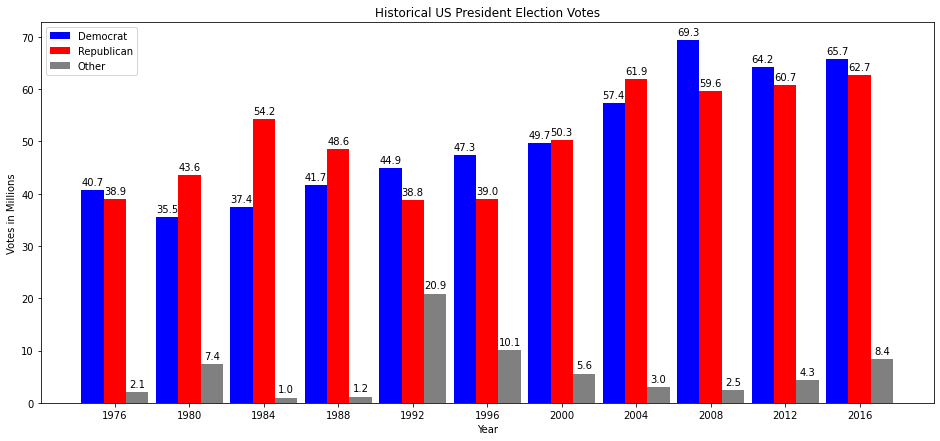

In [8]:
#Chart Historical US Elections
hist_chart=c_election_df.groupby(['Year','Party'])['Votes'].sum()
hist_chart=hist_chart.reset_index()
labels=hist_chart['Year'].unique()
#Series to plot
democrat=round(hist_chart.loc[hist_chart['Party']=='Democrat']['Votes']/1000000,1)
republican=round(hist_chart.loc[hist_chart['Party']=='Republican']['Votes']/1000000,1)
other=round(hist_chart.loc[hist_chart['Party']=='Other']['Votes']/1000000,1)
#Setup plot
x = np.arange(len(labels))
width = 0.30
fig, ax = plt.subplots(figsize=(16,7))
#Plot each series
rects1 = ax.bar(x - (width/2)*2, democrat, width, label='Democrat', color='blue')
rects2 = ax.bar(x, republican, width, label='Republican', color='red')
rects3 = ax.bar(x + width, other, width, label='Other', color='grey')
#SetLabels
ax.set_ylabel('Votes in Millions')
ax.set_xlabel('Year')
ax.set_title('Historical US President Election Votes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
#Function to put labels on top or each bar
def toplabels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
#Set labels and show plot
toplabels(rects1)
toplabels(rects2)
toplabels(rects3)
plt.show()


### By State

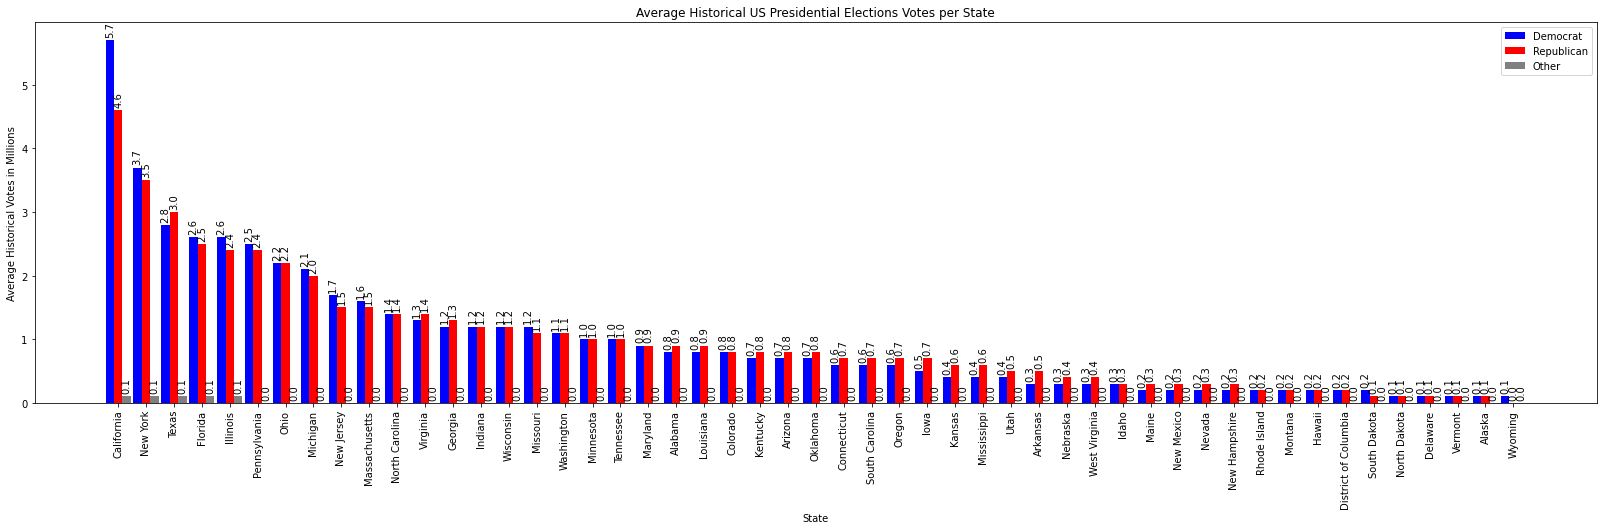

In [9]:
by_state = c_election_df.groupby(['State','Party'])['Votes'].mean()
by_state_sorted = by_state.sort_values(ascending=False)
#Chart Historical US Elections
hist_chart=by_state_sorted
hist_chart=hist_chart.reset_index()
labels=hist_chart['State'].unique()
#Series to plot
democrat=round(hist_chart.loc[hist_chart['Party']=='Democrat']['Votes']/1000000,1)
republican=round(hist_chart.loc[hist_chart['Party']=='Republican']['Votes']/1000000,1)
other=round(hist_chart.loc[hist_chart['Party']=='Other']['Votes']/1000000,1)
#Setup plot
x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots(figsize=(28,7))
#Plot each series
rects1 = ax.bar(x - (width/2)*2, democrat, width, label='Democrat', color='blue')
rects2 = ax.bar(x, republican, width, label='Republican', color='red')
rects3 = ax.bar(x + width, other, width, label='Other', color='grey')
#SetLabels
ax.set_ylabel('Average Historical Votes in Millions')
ax.set_xlabel('State')
ax.set_title('Average Historical US Presidential Elections Votes per State')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
#Function to put labels on top or each bar
def toplabels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', rotation=90)
#Set labels and show plot
toplabels(rects1)
toplabels(rects2)
toplabels(rects3)
plt.show()

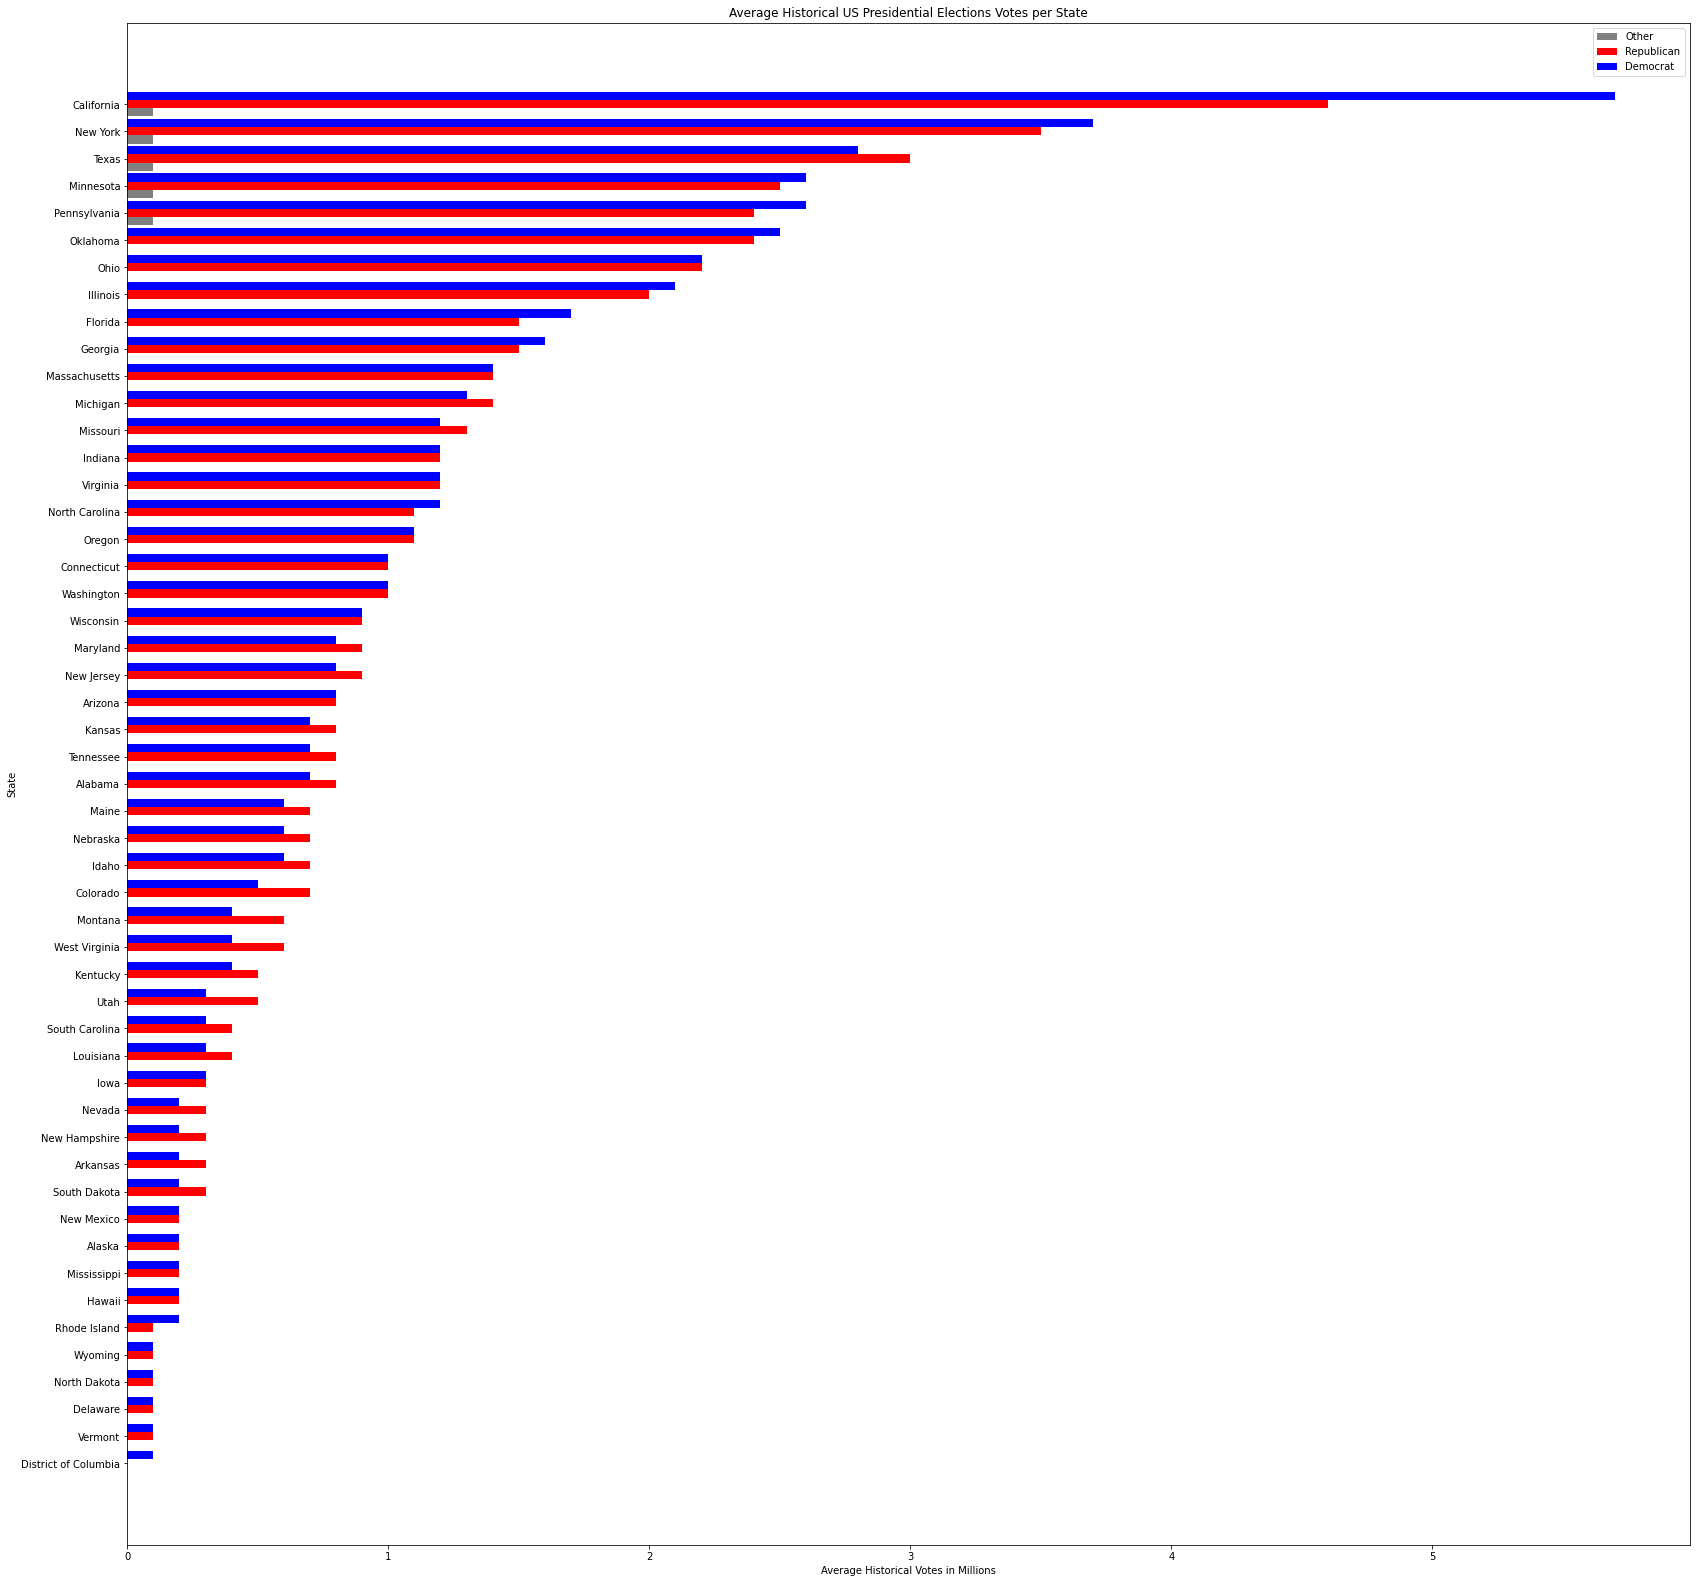

In [11]:
#Chart Historical US Elections
hist_chart=by_state.sort_values(ascending=True)
hist_chart=hist_chart.reset_index()
labels=hist_chart['State'].unique()
#Series to plot
democrat=round(hist_chart.loc[hist_chart['Party']=='Democrat']['Votes']/1000000,1)
republican=round(hist_chart.loc[hist_chart['Party']=='Republican']['Votes']/1000000,1)
other=round(hist_chart.loc[hist_chart['Party']=='Other']['Votes']/1000000,1)
#Setup plot
y = np.arange(len(labels))
# new_y = [2*i for i in y]
width = 0.3
fig, ax = plt.subplots(figsize=(28,28))
#Plot each series
rects1 = ax.barh(x - (width/2)*2, other, width, label='Other', color='gray')
rects2 = ax.barh(x, republican, width, label='Republican', color='red')
rects3 = ax.barh(x + width, democrat, width, label='Democrat', color='blue')
#SetLabels
ax.set_xlabel('Average Historical Votes in Millions')
ax.set_ylabel('State')
ax.set_title('Average Historical US Presidential Elections Votes per State')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()
#Function to put labels on top or each bar
# def toplabels(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', rotation=90)
#Set labels and show plot
# toplabels(rects1)
# toplabels(rects2)
# toplabels(rects3)
plt.show()

In [12]:
#Create US Map
#Configure API key
gmaps.configure(api_key=gkey)
#Get US States Geometry
us_states_geojson = gmaps.geojson_geometries.load_geometry('us-states')
#Get Colors based on State Party preference
state_map_df=c_election_df.groupby(['State','Party'])['Votes'].mean()
state_map_df=state_map_df.reset_index()
state_map_df=state_map_df.sort_values(['State','Votes'])
state_map_df = state_map_df.drop_duplicates(['State'], keep= 'last')
state_map_df['Party']=state_map_df['Party'].replace({'Republican': 'red', 'Democrat': 'blue'})
geoj_states=[]
for x in range(0,52):
    geoj_states.append(us_states_geojson['features'][x]['properties']['NAME'])
geoj_df = pd.DataFrame(geoj_states)
geoj_df=geoj_df.rename(columns={0: 'State'})
merge_df = pd.merge(geoj_df, state_map_df, on="State", how="left")
merge_df['Party'] = merge_df['Party'].fillna('gray')
colors=merge_df['Party'].tolist()
#Configure Map and Layer
fig = gmaps.figure(zoom_level=4 , center=(39,-98))
gini_layer = gmaps.geojson_layer(us_states_geojson, fill_color=colors, stroke_color=colors, fill_opacity=0.5)
fig.add_layer(gini_layer)
fig

Figure(layout=FigureLayout(height='420px'))

#### References:
1. MIT Election Data and Science Lab, 2017, "1976-2016-president.tab", U.S. President 1976–2016, https://doi.org/10.7910/DVN/42MVDX/MFU99O, Harvard Dataverse, V5, UNF:6:Mw0hOUHAijKPTVRAe5jJvg==doi/10.7910/DVN/42MVDX/MFU99O